In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
df=pd.read_csv("D:/R Programming/Data Files/7. ST Academy - Time Series resource files/daily-total-female-births-CA.csv", header=0)

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df["date"].dtype

dtype('O')

In [5]:
df2=pd.read_csv("D:/R Programming/Data Files/7. ST Academy - Time Series resource files/daily-total-female-births-CA.csv", header=0,parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2["date"].dtype

dtype('<M8[ns]')

### Loading as a Series

In [8]:
Series=pd.read_csv("D:/R Programming/Data Files/7. ST Academy - Time Series resource files/daily-total-female-births-CA.csv", 
                   header=0,parse_dates=[0],
                  index_col=0,squeeze=True)

In [9]:
Series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [10]:
 Series.shape

(365,)

In [11]:
df2.shape

(365, 2)

## Querrying by time

In [12]:
print(Series["1959.01"])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64


In [13]:
Series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [14]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [15]:
Dataviz_df=df2.copy()

In [16]:
Dataviz_df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:>

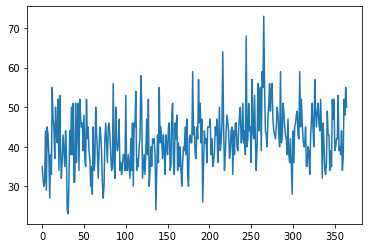

In [17]:
Dataviz_df["births"].plot()

In [18]:
Dataviz_df.index=Dataviz_df["date"]

<AxesSubplot:xlabel='date'>

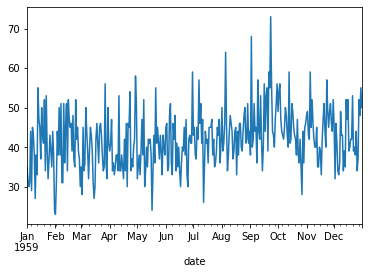

In [19]:
Dataviz_df["births"].plot()

## Zooming in

In [20]:
Dataviz_df2=Dataviz_df[(Dataviz_df["date"]>"1959-01-01")&(Dataviz_df["date"]<="1959-01-10")].copy()

In [21]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<AxesSubplot:xlabel='date'>

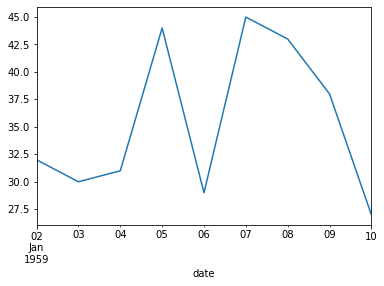

In [22]:
Dataviz_df2["births"].plot()

### Trendline

In [23]:
import seaborn as sns

<AxesSubplot:ylabel='births'>

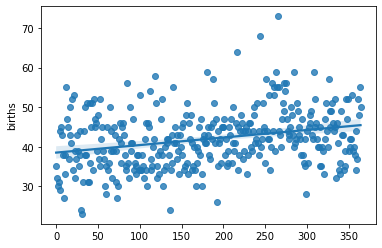

In [24]:
sns.regplot(x=df2.index.values,y=df2["births"])

<AxesSubplot:ylabel='births'>

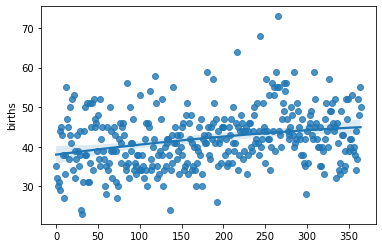

In [25]:
sns.regplot(x=df2.index.values,y=df2["births"],order=2)

# Seasonality

In [26]:
miles_df=pd.read_csv("D:/R Programming/Data Files/7. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv",
                    header=0,parse_dates=[0])

In [27]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<AxesSubplot:>

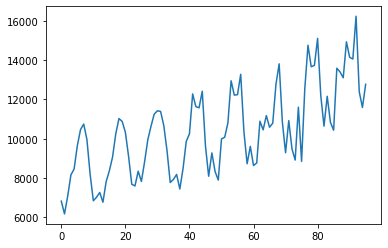

In [28]:
miles_df["MilesMM"].plot()

<AxesSubplot:ylabel='MilesMM'>

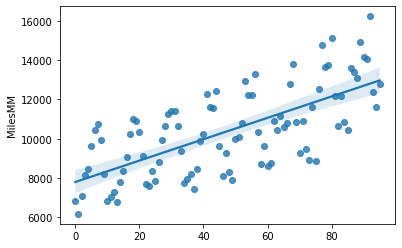

In [29]:
sns.regplot(x=miles_df.index.values,y=miles_df["MilesMM"])

## Removing seasonality

In [30]:
miles_df["year"]=miles_df['Month'].dt.year

In [31]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [32]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

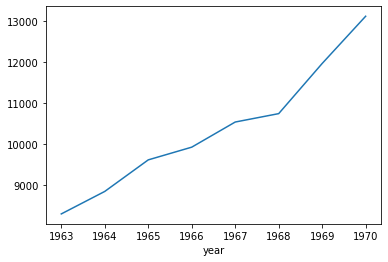

In [33]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating lag plots

In [34]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [35]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

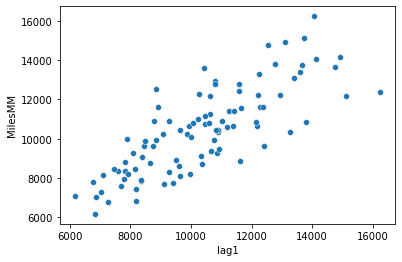

In [36]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

In [37]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

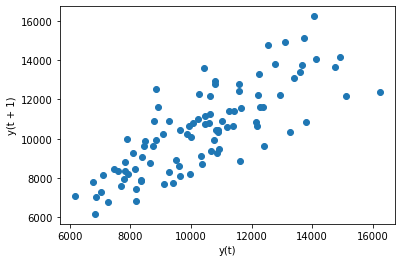

In [38]:
lag_plot(miles_df['MilesMM'])

## Autocorrelation plots

In [39]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

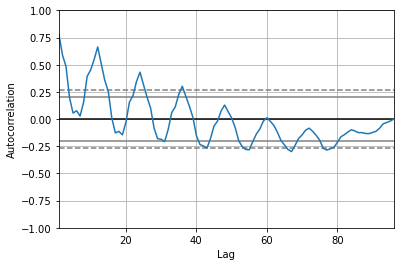

In [40]:
autocorrelation_plot(miles_df['MilesMM'])

#### High correlation for the first three periods.
#### There is a deep every six months. Maybe due to the seasonality.

# Feature engineering

## Date time features

In [42]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [45]:
features=df2.copy()

In [46]:
features['year']=df2['date'].dt.year

In [47]:
features['month']=df2['date'].dt.month

In [48]:
features['day']=df2['date'].dt.day

In [49]:
features.head(5)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [50]:
features.tail()

,date,births,year,month,day
360,1959-12-27,37,1959,12,27
361,1959-12-28,52,1959,12,28
362,1959-12-29,48,1959,12,29
363,1959-12-30,55,1959,12,30
364,1959-12-31,50,1959,12,31


## Lag features

In [51]:
features['lag1']=df2['births'].shift(1)

In [52]:
features['lag2']=df2['births'].shift(365)

In [53]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


## Windows features

In [55]:
features['Roll_mean']=df2['births'].rolling(window=2).mean()

In [56]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [57]:
features['Roll_max']=df2['births'].rolling(window=3).max()

In [58]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


## Expanding features

In [59]:
features['Expand_max']=df2['births'].expanding().max()

In [63]:
features.head(10)

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,44.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,29.0,NaN,37.0,45.0,45.0
7,1959-01-08,43,1959,1,8,45.0,NaN,44.0,45.0,45.0
8,1959-01-09,38,1959,1,9,43.0,NaN,40.5,45.0,45.0
9,1959-01-10,27,1959,1,10,38.0,NaN,32.5,43.0,45.0


# Downsampling and upsampling

## Downsampling

In [69]:
miles_df=pd.read_csv("D:/R Programming/Data Files/7. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv",
                    header=0,parse_dates=[0])
quarterly_miles_df=miles_df.resample('q',on='Month').mean()

In [70]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [72]:
yearly_total_miles_df=miles_df.resample('A',on='Month').sum()

In [73]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


<AxesSubplot:xlabel='Month'>

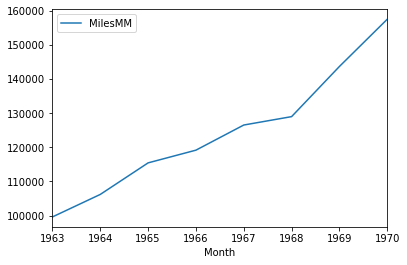

In [74]:
yearly_total_miles_df.plot()

## Upsampling

In [75]:
upsampled_miles_df=miles_df.resample('D',on='Month').mean()

In [76]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [78]:
interpolated_miles_df=upsampled_miles_df.interpolate(method='linear')

In [79]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<AxesSubplot:xlabel='Month'>

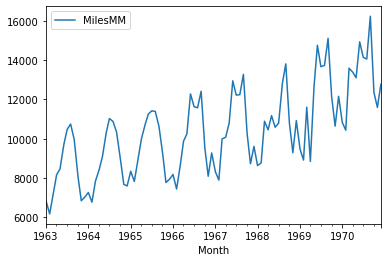

In [80]:
interpolated_miles_df.plot()

In [83]:
poly_interpolated_miles_df=upsampled_miles_df.interpolate(method='spline',order=2)

<AxesSubplot:xlabel='Month'>

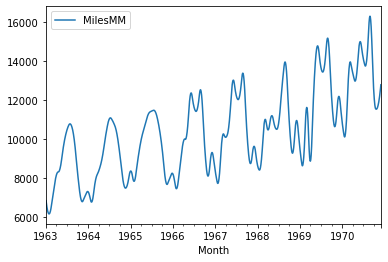

In [85]:
poly_interpolated_miles_df.plot()
# draw a curved line instead of the sharp line

# DECOMPOSING TIME SERIES

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [87]:
miles_decomp_df=pd.read_csv("D:/R Programming/Data Files/7. ST Academy - Time Series resource files/us-airlines-monthly-aircraft-miles-flown.csv",
                    header=0,parse_dates=[0])

In [88]:
miles_decomp_df.index=miles_decomp_df['Month']

In [89]:
result=seasonal_decompose(miles_decomp_df['MilesMM'],model='additive')

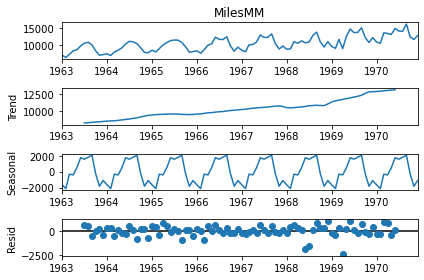

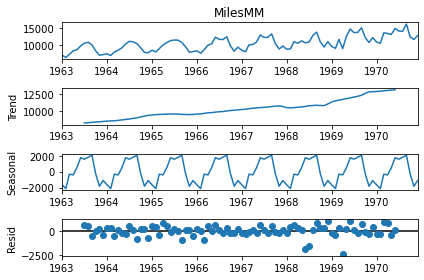

In [90]:
result.plot()

In [91]:
result2=seasonal_decompose(miles_decomp_df['MilesMM'],model='multiplicative')

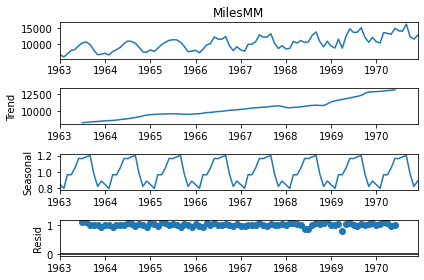

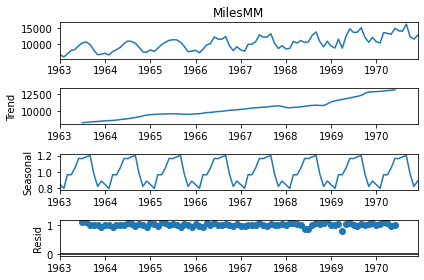

In [92]:
result2.plot()

In [93]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [94]:
miles_df['lag1']=miles_df['MilesMM'].diff(periods=1)

In [95]:
miles_df.head()

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,-649.0
2,1963-03-01,7084,906.0
3,1963-04-01,8162,1078.0
4,1963-05-01,8462,300.0


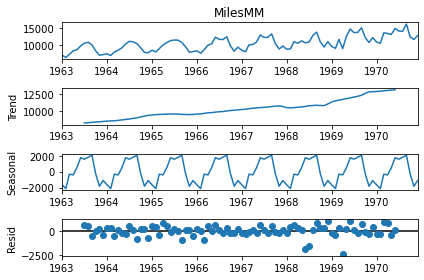

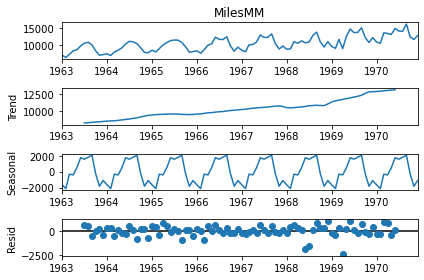

In [97]:
miles_df.index=miles_df['Month']
result_a=seasonal_decompose(miles_df['MilesMM'],model='additive')
result_a.plot()

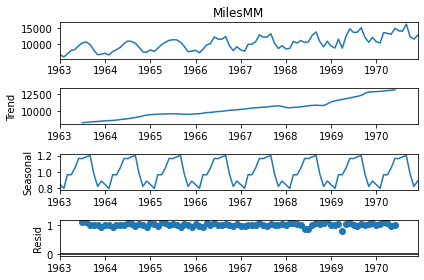

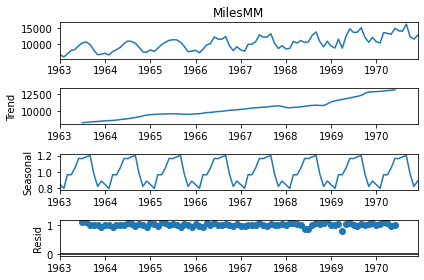

In [98]:
miles_df.index=miles_df['Month']
result_b=seasonal_decompose(miles_df['MilesMM'],model='multiplicative')
result_b.plot()

<AxesSubplot:xlabel='Month'>

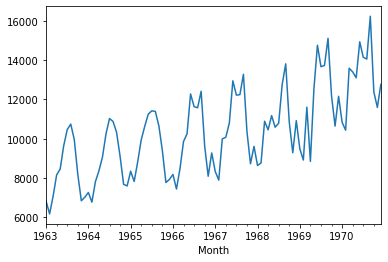

In [99]:
miles_df['MilesMM'].plot()

In [103]:
miles_df.head()

,Month,MilesMM,lag1
Month,,,
1963-01-01,1963-01-01,6827,NaN
1963-02-01,1963-02-01,6178,-649.0
1963-03-01,1963-03-01,7084,906.0
1963-04-01,1963-04-01,8162,1078.0
1963-05-01,1963-05-01,8462,300.0


# TEST-TRAIN SPLIT 

In [121]:
temp_df=pd.read_csv("D:/R Programming\Data Files/7. ST Academy - Time Series resource files/daily-min-temperatures.csv")

In [105]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [106]:
temp_df.shape

(3650, 2)

In [108]:
temp_df.shape[0]

3650

In [110]:
train_size=int(temp_df.shape[0]*0.8)
train_size

2920

In [115]:
train=temp_df[0:train_size]
train.shape

(2920, 2)

In [114]:
test=temp_df[train_size:]
test.shape

(730, 2)

In [124]:
df=pd.read_csv("D:/R Programming/Data Files/7. ST Academy - Time Series resource files/daily-min-temperatures.csv",
                    header=0,parse_dates=[0])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [126]:
df['t']=df['Temp'].shift(1)
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [128]:
train,test=df[1:df.shape[0]-7],df[df.shape[0]-7:]

In [129]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [130]:
train_x,train_y=train['t'],train['Temp']
test_x,test_y=test['t'],test['Temp']

## Walk-forward validation

In [132]:
predictions=test_x.copy()

In [133]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [134]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y,predictions)
mse

3.4228571428571413

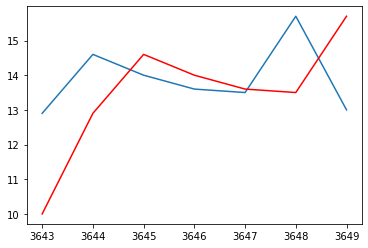

In [136]:
plt.plot(test_y)
plt.plot(predictions, color='red')

### Autoregression Model

In [142]:
from statsmodels.tsa.ar_model import AR

In [152]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8
